
Solving laberinto1.txt

Comparison Results:
Algorithm	Path Length	Visited Nodes	Time (s)
A*		15		36		0.000000
BFS		15		43		0.000000


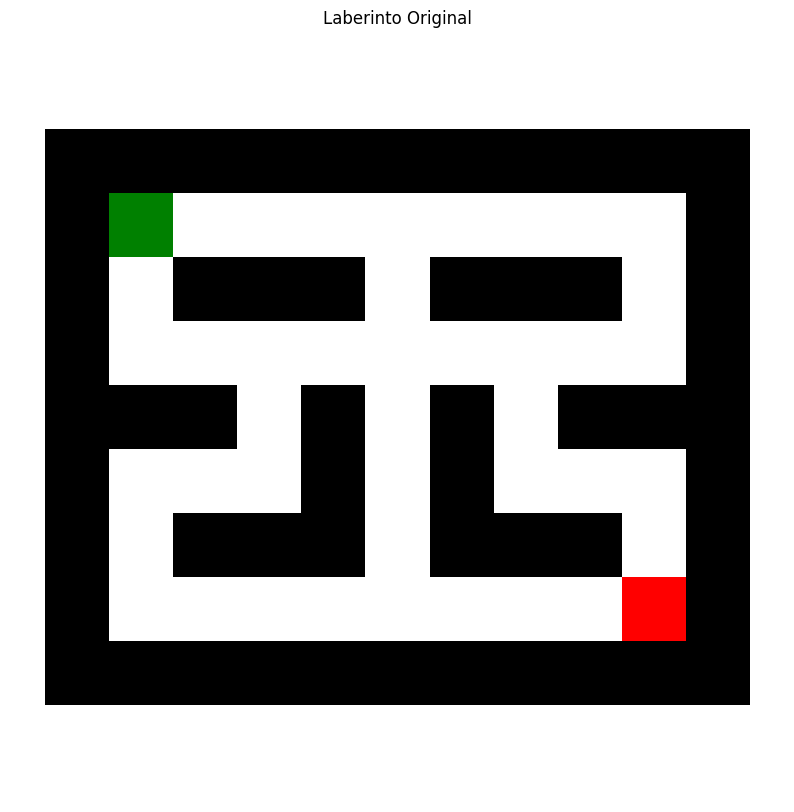

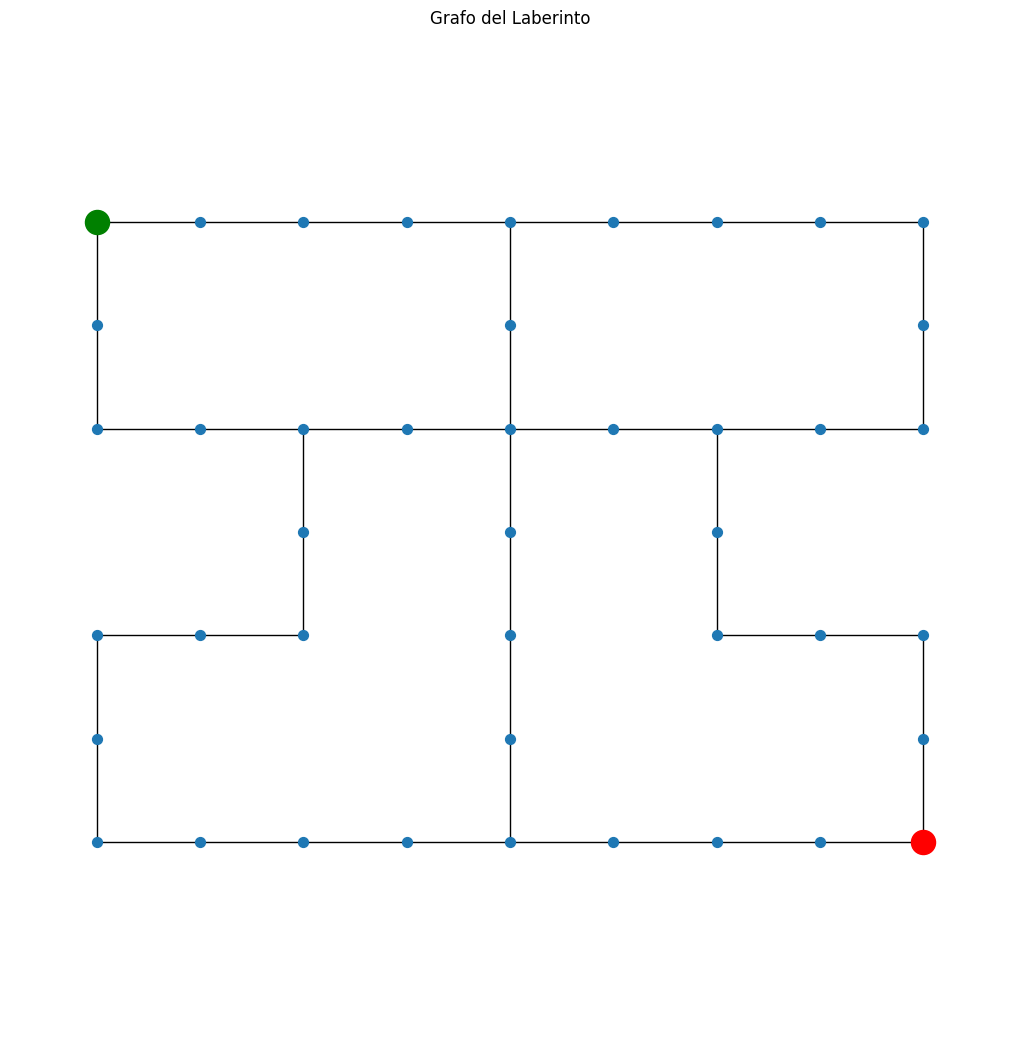

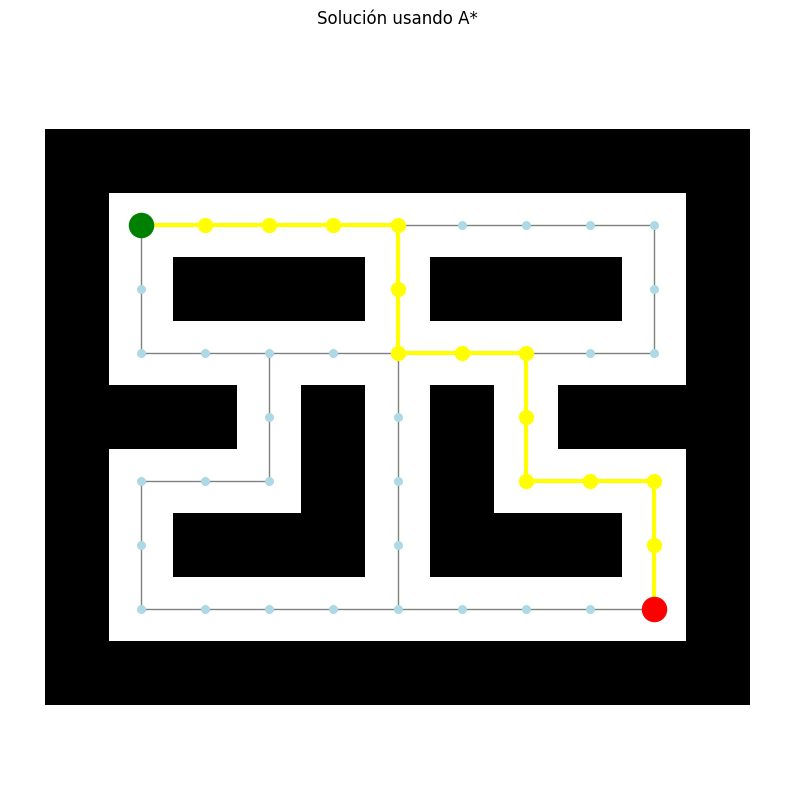

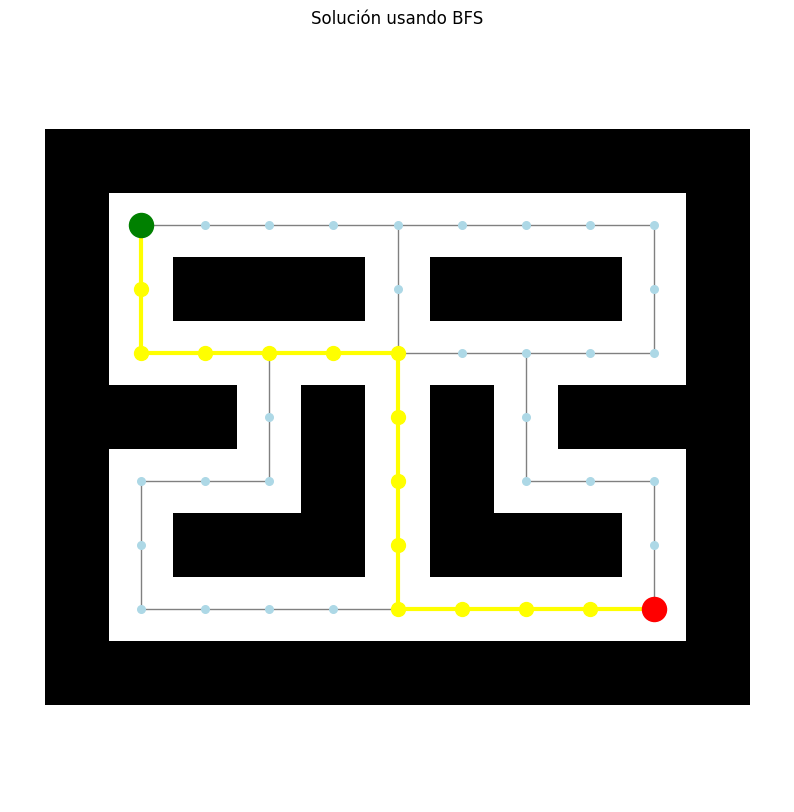



Overall Performance Comparison:

Metric: Path Length
Maze		A*		BFS
laberinto1.txt	15		15

Metric: Visited Nodes
Maze		A*		BFS
laberinto1.txt	36		43

Metric: Time
Maze		A*		BFS
laberinto1.txt	0.000000	0.000000


In [7]:
import heapq
import time
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class MazeSolver:
    def __init__(self, maze_file):
        self.maze = self.load_maze(maze_file)
        self.graph = self.build_graph()
        self.nx_graph = self.build_networkx_graph()
        self.start, self.end = self.find_start_end()
        self.pos = self.calculate_node_positions()
        
    def load_maze(self, maze_file):
        with open(maze_file, 'r') as f:
            maze = [list(line.strip()) for line in f.readlines()]
        return maze
    
    def find_start_end(self):
        start, end = None, None
        for i in range(len(self.maze)):
            for j in range(len(self.maze[i])):
                if self.maze[i][j] == 'E':
                    start = (i, j)
                elif self.maze[i][j] == 'S':
                    end = (i, j)
        return start, end
    
    def build_graph(self):
        graph = {}
        rows = len(self.maze)
        cols = len(self.maze[0]) if rows > 0 else 0
        
        for i in range(rows):
            for j in range(cols):
                if self.maze[i][j] != '#':
                    neighbors = []
                    # Check all 4 directions
                    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < rows and 0 <= nj < cols and self.maze[ni][nj] != '#':
                            neighbors.append((ni, nj))
                    graph[(i, j)] = neighbors
        return graph
    
    def build_networkx_graph(self):
        G = nx.Graph()
        for node in self.graph:
            G.add_node(node)
            for neighbor in self.graph[node]:
                G.add_edge(node, neighbor)
        return G
    
    def calculate_node_positions(self):
        # Invertir las coordenadas Y para que el laberinto se vea correctamente
        return {node: (node[1], -node[0]) for node in self.nx_graph.nodes()}
    
    def heuristic(self, a, b):
        # Manhattan distance
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    def a_star_search(self):
        frontier = []
        heapq.heappush(frontier, (0, self.start))
        came_from = {self.start: None}
        cost_so_far = {self.start: 0}
        visited_nodes = 0
        
        while frontier:
            current = heapq.heappop(frontier)[1]
            visited_nodes += 1
            
            if current == self.end:
                break
                
            for next_node in self.graph[current]:
                new_cost = cost_so_far[current] + 1
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost + self.heuristic(self.end, next_node)
                    heapq.heappush(frontier, (priority, next_node))
                    came_from[next_node] = current
        
        # Reconstruct path
        path = []
        if self.end in came_from:
            current = self.end
            while current != self.start:
                path.append(current)
                current = came_from[current]
            path.append(self.start)
            path.reverse()
        
        return path, visited_nodes
    
    def bfs_search(self):
        frontier = deque()
        frontier.append(self.start)
        came_from = {self.start: None}
        visited_nodes = 0
        
        while frontier:
            current = frontier.popleft()
            visited_nodes += 1
            
            if current == self.end:
                break
                
            for next_node in self.graph[current]:
                if next_node not in came_from:
                    frontier.append(next_node)
                    came_from[next_node] = current
        
        # Reconstruct path
        path = []
        if self.end in came_from:
            current = self.end
            while current != self.start:
                path.append(current)
                current = came_from[current]
            path.append(self.start)
            path.reverse()
        
        return path, visited_nodes
    
    def visualize_maze(self):
        plt.figure(figsize=(10, 10))
        # Draw the maze
        for i in range(len(self.maze)):
            for j in range(len(self.maze[i])):
                if self.maze[i][j] == '#':
                    plt.fill([j-0.5, j+0.5, j+0.5, j-0.5], 
                            [-i+0.5, -i+0.5, -i-0.5, -i-0.5], 'k')
                elif (i, j) == self.start:
                    plt.fill([j-0.5, j+0.5, j+0.5, j-0.5], 
                            [-i+0.5, -i+0.5, -i-0.5, -i-0.5], 'g')
                elif (i, j) == self.end:
                    plt.fill([j-0.5, j+0.5, j+0.5, j-0.5], 
                            [-i+0.5, -i+0.5, -i-0.5, -i-0.5], 'r')
        plt.title("Laberinto Original")
        plt.axis('equal')
        plt.axis('off')
        plt.show()
    
    def visualize_graph(self):
        plt.figure(figsize=(10, 10))
        nx.draw(self.nx_graph, pos=self.pos, with_labels=False, node_size=50)
        
        # Highlight start and end
        nx.draw_networkx_nodes(self.nx_graph, self.pos, nodelist=[self.start], 
                              node_color='green', node_size=300)
        nx.draw_networkx_nodes(self.nx_graph, self.pos, nodelist=[self.end], 
                              node_color='red', node_size=300)
        
        plt.title("Grafo del Laberinto")
        plt.axis('equal')
        plt.axis('off')
        plt.show()
    
    def visualize_solution(self, path, algorithm_name):
        plt.figure(figsize=(10, 10))
        
        # Draw the maze
        for i in range(len(self.maze)):
            for j in range(len(self.maze[i])):
                if self.maze[i][j] == '#':
                    plt.fill([j-0.5, j+0.5, j+0.5, j-0.5], 
                            [-i+0.5, -i+0.5, -i-0.5, -i-0.5], 'k')
        
        # Draw the graph
        nx.draw(self.nx_graph, pos=self.pos, with_labels=False, node_size=30, 
                node_color='lightblue', edge_color='gray', width=1)
        
        # Highlight the path
        if path:
            path_edges = list(zip(path[:-1], path[1:]))
            nx.draw_networkx_nodes(self.nx_graph, self.pos, nodelist=path, 
                                 node_color='yellow', node_size=100)
            nx.draw_networkx_edges(self.nx_graph, self.pos, edgelist=path_edges, 
                                 edge_color='yellow', width=3)
        
        # Highlight start and end
        nx.draw_networkx_nodes(self.nx_graph, self.pos, nodelist=[self.start], 
                              node_color='green', node_size=300)
        nx.draw_networkx_nodes(self.nx_graph, self.pos, nodelist=[self.end], 
                              node_color='red', node_size=300)
        
        plt.title(f"Solución usando {algorithm_name}")
        plt.axis('equal')
        plt.axis('off')
        plt.show()
    
    def compare_algorithms(self):
        # A* search
        start_time = time.time()
        a_star_path, a_star_visited = self.a_star_search()
        a_star_time = time.time() - start_time
        
        # BFS search
        start_time = time.time()
        bfs_path, bfs_visited = self.bfs_search()
        bfs_time = time.time() - start_time
        
        # Metrics
        a_star_length = len(a_star_path) if a_star_path else 0
        bfs_length = len(bfs_path) if bfs_path else 0
        
        print("\nComparison Results:")
        print(f"Algorithm\tPath Length\tVisited Nodes\tTime (s)")
        print(f"A*\t\t{a_star_length}\t\t{a_star_visited}\t\t{a_star_time:.6f}")
        print(f"BFS\t\t{bfs_length}\t\t{bfs_visited}\t\t{bfs_time:.6f}")
        
        # Visualize solutions
        self.visualize_maze()
        self.visualize_graph()
        self.visualize_solution(a_star_path, "A*")
        self.visualize_solution(bfs_path, "BFS")
        
        return {
            'A*': {'path_length': a_star_length, 'visited_nodes': a_star_visited, 'time': a_star_time},
            'BFS': {'path_length': bfs_length, 'visited_nodes': bfs_visited, 'time': bfs_time}
        }


maze_files = ['laberinto1.txt']
results = {}

for maze_file in maze_files:
    print(f"\n{'='*50}")
    print(f"Solving {maze_file}")
    print(f"{'='*50}")
    
    solver = MazeSolver(maze_file)
    results[maze_file] = solver.compare_algorithms()

# Comparativa de resultados
print("\n\nOverall Performance Comparison:")
for metric in ['path_length', 'visited_nodes', 'time']:
    print(f"\nMetric: {metric.replace('_', ' ').title()}")
    print("Maze\t\tA*\t\tBFS")
    for maze in maze_files:
        a_star_val = results[maze]['A*'][metric]
        bfs_val = results[maze]['BFS'][metric]
        if isinstance(a_star_val, float):
            print(f"{maze}\t{a_star_val:.6f}\t{bfs_val:.6f}")
        else:
            print(f"{maze}\t{a_star_val}\t\t{bfs_val}")